In [64]:
import pandas
import numpy as np

# Machine Learning - IN221 - February 2025
## Eng. Ahmed Métwalli
## Week 2 - Hands-on Coding

<img src = 'Images/datasc-660x434.png'>

## [View Section: Linear Regression Guidelines](SecWeek2.pdf)

# Getting started with Data Scient Lifecycle coding

## Importing Packages

In [65]:
# Pandas > Data manipulation
# Import Numpy (Numerical operations)
# Matplotlib for visualization
 # How to visualize data (matplotlib.pyplot and seaborn)
import pandas as pd,\
        numpy as np

## Importing Covid-19 Dataset

In [66]:
# Filename
file_name = "Public Datasets/covid_19_clean_complete.csv.zip" # The file of the dataset

In [67]:
df = pd.read_csv(file_name
                 ,compression='zip') # The dataframe to be imported

### Objective: Our aim is to predict the amount of death in the next days or weeks.

## Data & Business Understanding

In [68]:
df.info() # To view information about each attribute
# Number of non-null items
# Datatype of each feature
# Shape of the data (RangeIndex > number or rows, Columns)
# Memory Usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


- Province/State: It contains the province and state of record.
- Country/Region: This is the country and the region of a record
- Lat: The lattitude of the region/country
- Long: The longitude of the region/country
- Date: The date at which that record has occured
- Confirmed: The number of people per day confirmed to be having covid 19
- Deaths: The number of deaths per day by covid 19
- Recovered: The number of recovered from covid 19 per day
- Active: The number of active cases (still having covid till that day)
- WHO Region: World health organization region of the record

Issue:
- The province/State contains may nulls more than 30000
- The Date column should be datetime format (df['Date'] > should be datetime format)

In [69]:
df.describe() # Descriptive statistics of data

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


Insights:
- We saw that the highest number of death per day was 148011
- Confirmed > Mean of confirmed covid-19 is 10x higher of Q3 (third quartile 75% data)
- Same with Recovered 
- What does the negative in Long or Lat represent?
    - Because Longitude/Lattitude are the positions with respect to region (- or +ve location) 
- Confirmed Mean >> Median

In [70]:
df['Province/State'].isna().sum()

34404

## Data Preparation

- Solving issue 1: Droping column of province/state

In [71]:
df.isna().sum() # View the number of missing values

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

Province/State contains many nulls 34404 out 49068, therefore we can drop it or dive deeper to understand the existing non-missing values.

In [77]:
df.drop(labels = 'Province/State',
        axis=1,
        inplace = True) # Axis = 1 (dropping a column) - inplace = True (Commit)

In [78]:
df.isna().sum() # Now we should have no nulls

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

# Lab Week3: Continue DS LifeCycle

In [84]:
df['Date'] = pd.to_datetime(df['Date'])

- Solving issue 2: Converting date to datetime column

In [92]:
df['Date'] = pd.to_datetime(df['Date']) # pd.to_datetime(Series)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


In [95]:
df.duplicated().sum()

0

## Data visualization

### EDA: Univariate, Bivariate and Multivariate Exploration
- Univariate Exploration: Explore a single feature
- Bivariate Exploration: Exploring two features and study their relation
- Multivariate Exploration: Exploring multiple features > 2 togehter 

Here we will use some plottings to explore the data visually

In [13]:
import matplotlib.pyplot as plt, seaborn as sb

- Q&A:
    - PairPlot is a bivariate exploration for each variable with another in each cell

- Q&A: 
    - What is that shape of the pairgrid?
        - Our objective is to plot numerical features in a grid

#### Import the packages of the plotting

In [14]:
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization

#### Let's first plot all relations together, and pick the important relations by eyes and document them

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


In [16]:
df.select_dtypes(['int64','float64']).columns

Index(['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

- Q&A:
    - PairGrid vs Plot - Done
    - Why Long and Lattitude looks like this?
        - Because there are no correlation between them hence, it looks like it is random.
    - Why we have duplicate figures?
        - The change of the axis (Ex: Death vs Confirmed first time we have Death on X axis, second time Confirmed in X axis)
    - Why are the diagonal scatters having perfect linear relation?
        - Because this is the relation between the feature itself (Autocorrelation) 

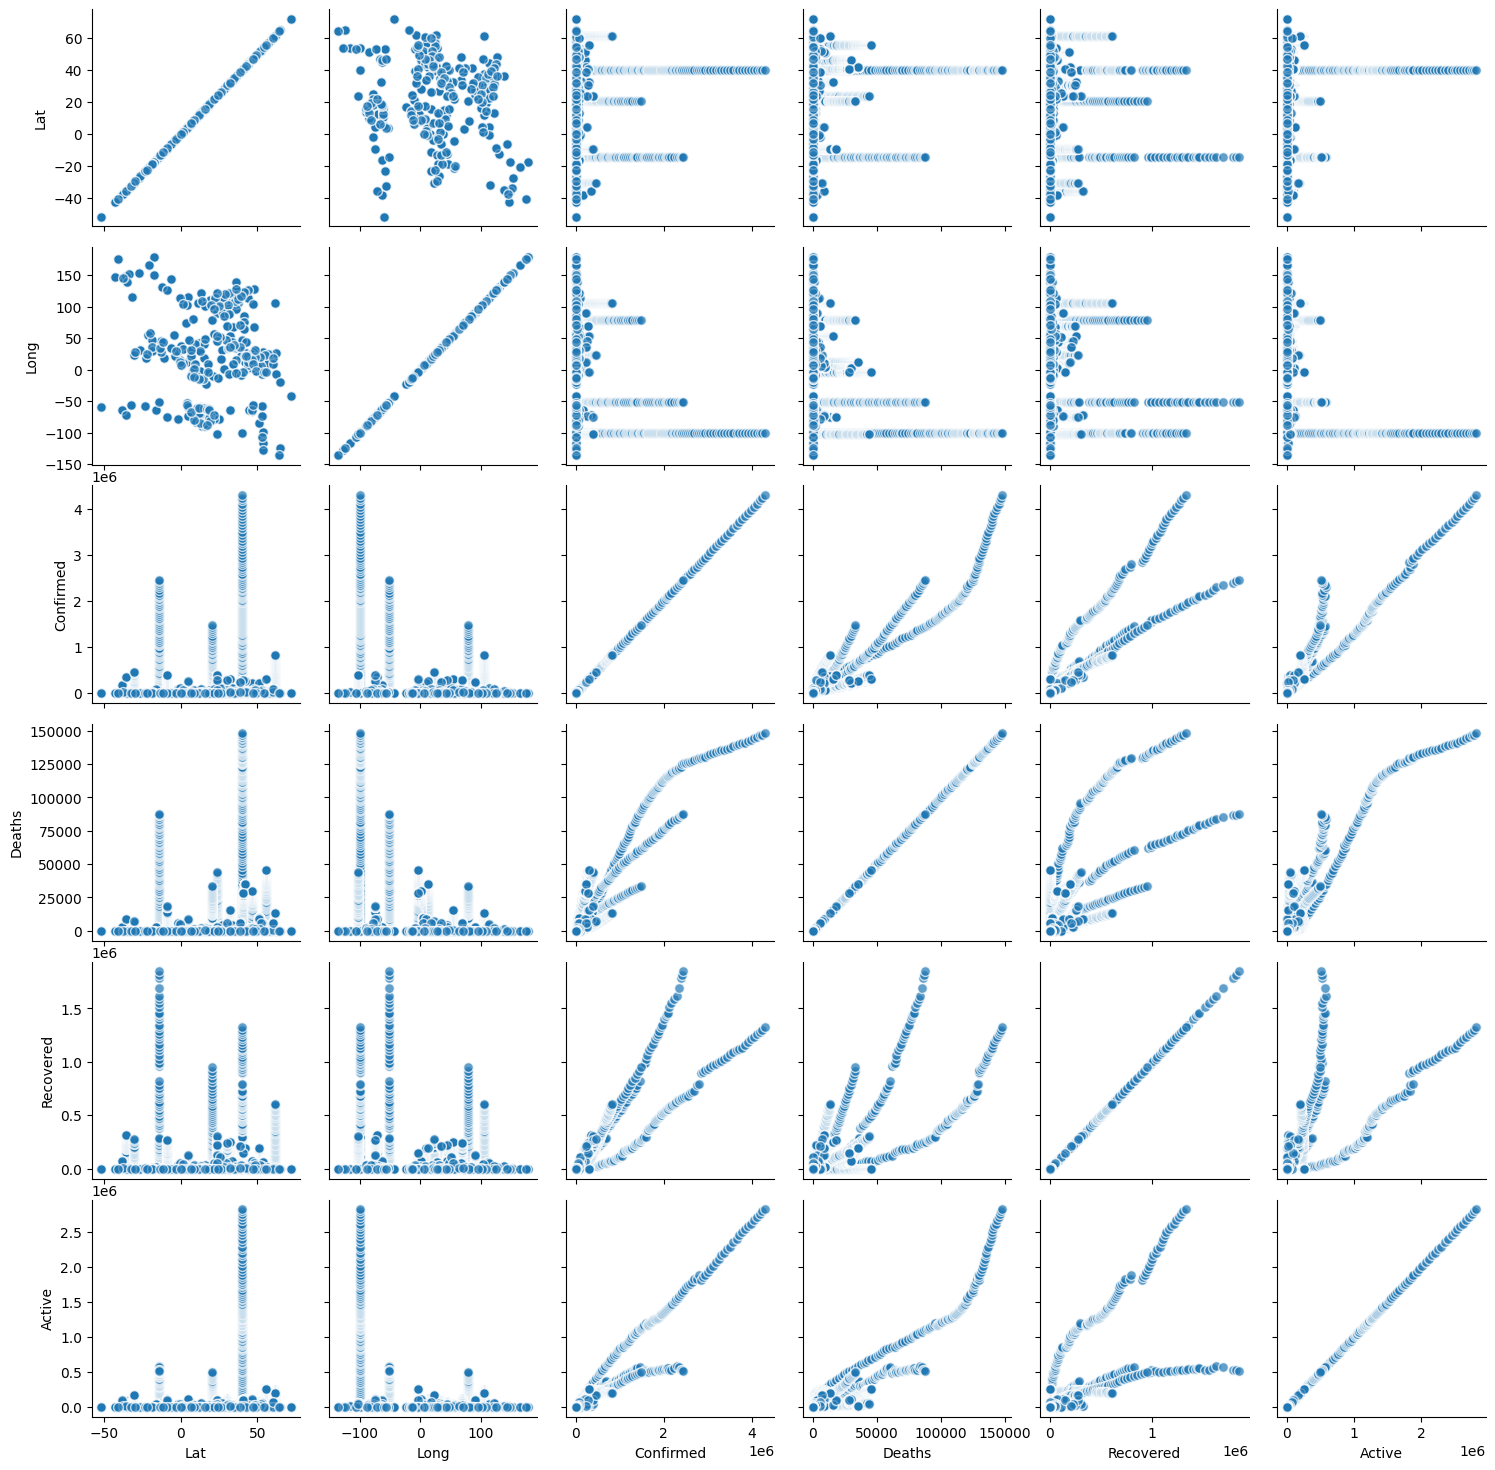

In [ ]:
grid = sns.PairGrid(df) # We define a pair grid object from the dataframe and then plot the scatter plot
grid.map(func=plt.scatter, # Function plt.scatter
         s=50, # marker sizeb
         edgecolor='w', # edge color is white
         alpha=0.7) # Alpha in plotting means the intensity of color,We plot the scatter plot as .map has the func and the args

Insights:

- Positive correlation between confirmed and deaths (looks like highly positive) - recovered and activate
- Long/Lat does not have any relation

Q&A:
- Mariam: How to use functions and what to write?
    - Pandas, Numpy, Matplotlib, Seaborn
        - .read_csv() > Importing Data
        - .head(), .tail(), .sample(), .info(), .describe() > Data Understanding + Documentation
        - .drop(), .to_datetime(), .duplicated() > Data Preparation + Documention
        - .PairGrid(), .map(), .scatter(), .select_dtypes() > EDA + Documentation
- Ali: Documentation if I have missing documentation for example Kaggle dataset without any information?
    - Assessing the data: 
        - df.info() - Memory - Columns Datatypes - Number of cols/rows - NonNull and null
        - df.describe() - Numerical insights + Documentation
        - If the name of the column is not clear: Search on the internet for each column name + Document (Unit)
- Ali: We did not use df.duplicated() till now?
    - The current dataframe is already clean of duplicates.
- Ali: Data visualization?
    - PairGrid we draw all columns together in pair (Scatter plot)
- Abdelrahman & Mahmoud: Exam?
    - On Paper: Gradient Descent
    - On PC: DS Lifecycle till the PairGrid
- Abdelrahman:
    - How do we document on paper?
        - Documentation of gradient descent (J loss function vs alpha)
- Omar:
    - Gradient Descent (What about Sita)?
        - Can increase or can decrease

- Since our interest is the number of deaths, let's see the features that affect the number of deaths
    - From visualization I can see there is strong +ve relation between Deaths and Active/Confirmed/Recovered
    - Next step let's see the correlation map

<Axes: >

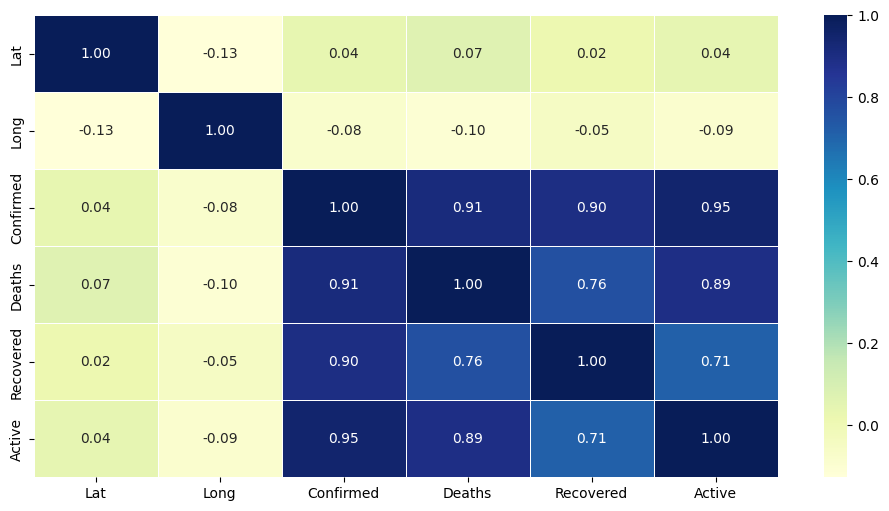

In [19]:
plt.figure(figsize=[12,6])
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),
            annot=True,
            fmt=".2f", cmap="YlGnBu",
            linewidths=0.5)

- What do you see in that correlation matrix?
    - Is our initial theory validated about the number of death we have seen visually?

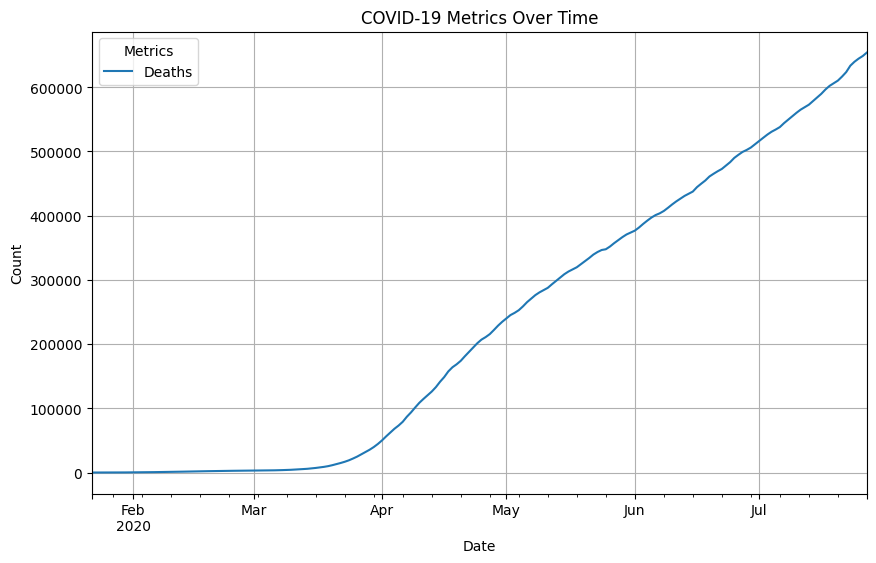

In [20]:
df_grouped = df.groupby('Date')[['Deaths']].sum() # Group the data by date and sum the values for each metric

# Plot all the metrics on the same axes
df_grouped.plot(figsize=(10,
                         6)) # plt.plot!
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("COVID-19 Metrics Over Time")
plt.legend(title="Metrics")
plt.grid()
plt.show()


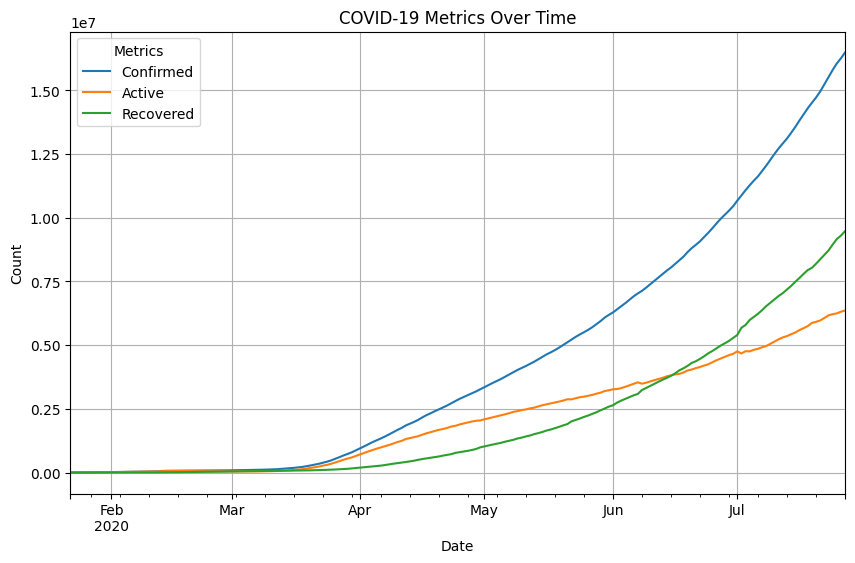

In [21]:
df_grouped = df.groupby('Date')[['Confirmed', 'Active', 'Recovered']].sum() # Group the data by date and sum the values for each metric

# Plot all the metrics on the same axes
df_grouped.plot(figsize=(10,
                         6))
plt.xlabel("Date") # label of x axis
plt.ylabel("Count") # label of y axis
plt.title("COVID-19 Metrics Over Time") # plt.tile covid 19
plt.legend(title="Metrics") # legends
plt.grid()
plt.show()


- I can see that between March & April was a rising point for Covid-19

What about adding the date as a feature later on?

# Feature Engineering

- Let's extract important features out of date

In [22]:
# Extract useful numerical features from Date
df['Year'] = df['Date'].dt.year # Year
df['Month'] = df['Date'].dt.month # Month
df['Day'] = df['Date'].dt.day # Day
df['DayOfWeek'] = df['Date'].dt.weekday # Weekday?? - weekday index each week
df['WeekOfYear'] = df['Date'].dt.isocalendar().week # Index of the week per year
df['DaysSinceStart'] = (df['Date'] - df['Date'].min()).dt.days # Days Difference since start of Covid19 epidemic

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
 9   Year            49068 non-null  int32         
 10  Month           49068 non-null  int32         
 11  Day             49068 non-null  int32         
 12  DayOfWeek       49068 non-null  int32         
 13  WeekOfYear      49068 non-null  UInt32        
 14  DaysSinceStart  49068 non-null  int64         
dtypes:

<Axes: >

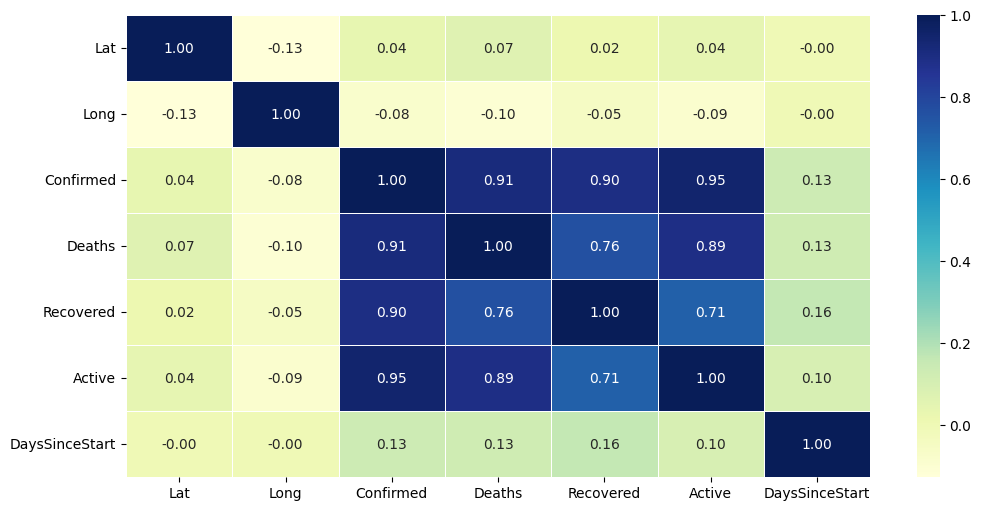

In [24]:
plt.figure(figsize=[12,6])
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),
            annot=True,
            fmt=".2f", cmap="YlGnBu",
            linewidths=0.5)

- Now based on what we had so far, we should already have gained sufficient understanding about the data
- Next step is doing Feature Engineering based on what we have from data in order to establish the ML model.
    - Remember the ML Model objective is to: Predict the daily number of death for the next 15 days.